In [53]:
import pandas as pd
import seaborn as sns
import numpy as np

In [54]:
df = pd.read_csv("Crop_recommendation.csv")

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [55]:
df.value_counts()


N    P   K   temperature  humidity   ph        rainfall    label      
140  45  15  25.530827    80.046628  5.801048  99.395572   cotton         1
0    5   36  24.351938    90.886124  6.152907  105.529185  pomegranate    1
     12  7   20.184323    90.654585  6.969250  116.813097  orange         1
     17  30  35.474783    47.972305  6.279134  97.790725   mango          1
         42  23.202426    91.194427  6.859841  109.094632  pomegranate    1
                                                                         ..
1    6   35  27.022692    95.719354  6.231663  147.168246  coconut        1
     8   26  27.513630    94.189558  5.562912  156.673255  coconut        1
     12  30  27.754298    95.946438  5.562224  131.090008  coconut        1
     15  9   29.983647    94.552397  7.533509  115.356032  orange         1
     17  6   10.786898    91.384119  6.819827  117.529345  orange         1
Name: count, Length: 2200, dtype: int64

In [56]:
cat_col=df.select_dtypes(include="O")
cat_col.head()

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [57]:
num_col=df.select_dtypes(exclude="O")
num_col.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [58]:
cat_col["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [59]:
dt={ 
"rice":1,
"maize":2,       
"jute":3,          
"cotton":4 ,    
"coconut":5,     
"papaya":6,        
"orange":7,        
"apple":8,          
"muskmelon":9,      
"watermelon":10,    
"grapes":11,      
"mango":12,         
"banana":13,         
"pomegranate":14,    
"lentil":15,         
"blackgram":16,     
"mungbean":17,       
"mothbeans":18,      
"pigeonpeas":19,     
"kidneybeans":20 ,   
"chickpea":21,       
"coffee":22,        
}

In [60]:
cat_col["label"]=cat_col["label"].map(dt) #map ko ek bar hi chaleyenge nhi to nan value dega
cat_col.head()

,label
0,1
1,1
2,1
3,1
4,1


In [61]:
cat_col.label.value_counts()

label
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [62]:
x=df.drop('label',axis=1)
y=df['label']

In [63]:
df=pd.concat([cat_col,num_col],axis=1)
df.head()

,label,N,P,K,temperature,humidity,ph,rainfall
0,1,90,42,43,20.879744,82.002744,6.502985,202.935536
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,1,60,55,44,23.004459,82.320763,7.840207,263.964248
3,1,74,35,40,26.491096,80.158363,6.980401,242.864034
4,1,78,42,42,20.130175,81.604873,7.628473,262.717340


In [64]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [65]:
cat_col.label.value_counts()

label
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [67]:
x_train.shape

(1760, 7)

In [68]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x_train=mx.fit_transform(x_train)
x_test=mx.transform(x_test)

In [69]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1760, 7))

In [70]:
#XGBClassifier most impo algo

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [72]:
model={
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()

}

In [73]:
for name,model in model.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print(f"{name} model with accuracy :{score}")

LogisticRegression model with accuracy :0.9181818181818182
GaussianNB model with accuracy :0.9954545454545455
SVC model with accuracy :0.9681818181818181
KNeighborsClassifier model with accuracy :0.9681818181818181
DecisionTreeClassifier model with accuracy :0.9863636363636363
ExtraTreeClassifier model with accuracy :0.9318181818181818
RandomForestClassifier model with accuracy :0.9931818181818182
BaggingClassifier model with accuracy :0.9931818181818182
GradientBoostingClassifier model with accuracy :0.9818181818181818
AdaBoostClassifier model with accuracy :0.14545454545454545


In [74]:
##to save the model
import joblib,pickle
joblib.dump(model,"Crop_reccomend model.pkl")

['Crop_reccomend model.pkl']

In [75]:
df.describe()

,label,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,11.500000,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,6.345731,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,1.000000,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,6.000000,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,11.500000,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,17.000000,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,22.000000,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

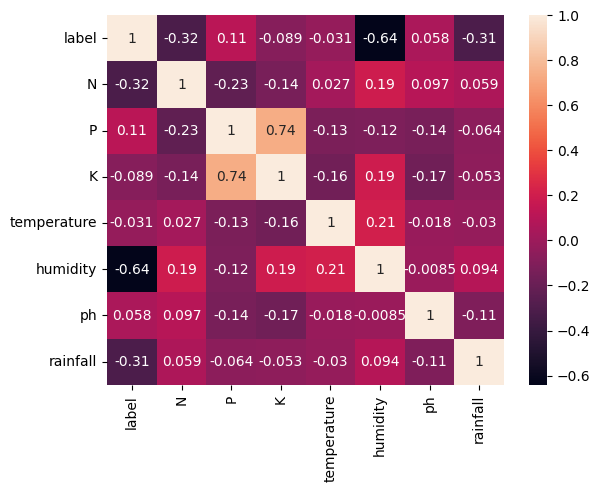

In [76]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
print(model.n_features_in_)


7
